In [164]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [165]:
df=pd.read_csv('HousingData.csv')

In [166]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


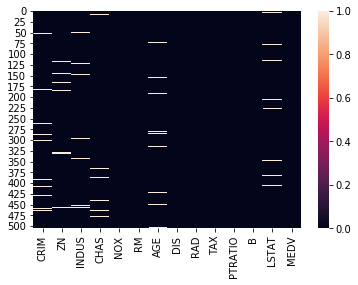

In [168]:
sns.heatmap(df.isnull())

In [169]:
#CRIM , ZN , INDUS , CHAS , AGE , lSTAT are having null values
'''
1)CRIM-per capita crime rate by town
2)ZN-Proportion of residential land over zoned 25000ft
3)INDUS-proportion of non-retail business acres per town
4)CHAS-Charles dimmed river variable 
5)AGE-Age of house 
6)LSTAT-lower status of the population
target-MEDV
'''

'\n1)CRIM-per capita crime rate by town\n2)ZN-Proportion of residential land over zoned 25000ft\n3)INDUS-proportion of non-retail business acres per town\n4)CHAS-Charles dimmed river variable \n5)AGE-Age of house \n6)LSTAT-lower status of the population\ntarget-MEDV\n'

In [170]:
a=np.mean(df['AGE'])
print(a)
df['AGE'].fillna(a,inplace=True)

68.51851851851852


In [171]:
df['AGE'].isnull().value_counts()

False    506
Name: AGE, dtype: int64

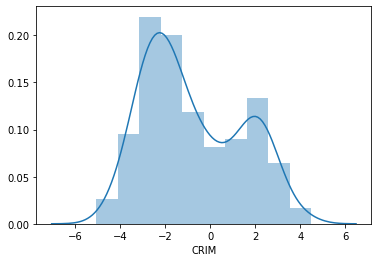

In [172]:
sns.distplot(np.log(df['CRIM']))

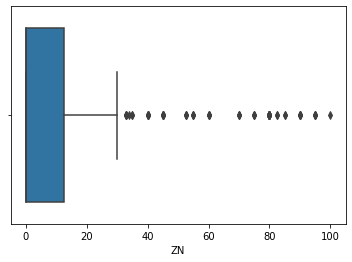

In [173]:
sns.boxplot(df['ZN'])

In [174]:
a=df[(df['ZN']<20)]['ZN'].index
b=df[(df['ZN']>=20) & (df['ZN']<40)]['ZN'].index
c=df[(df['ZN']>=40) & (df['ZN']<60)].index
d=df[(df['ZN']>=60) & (df['ZN']<80)]['ZN'].index
e=df[(df['ZN']>=80) & (df['ZN']<=100)]['ZN'].index

In [175]:

df.loc[a,'ZN']=1
df.loc[b,'ZN']=2
df.loc[c,'ZN']=3
df.loc[d,'ZN']=4
df.loc[e,'ZN']=5    

In [176]:
df['ZN'].isnull().value_counts()

False    486
True      20
Name: ZN, dtype: int64

In [177]:
df[df['ZN']<20]['ZN'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],
           dtype='int64', length=486)

In [178]:
#It is clear that most of the values are less than 20 so now we will replace median/mode


In [211]:
df['ZN'].fillna(np.min(df['ZN']),inplace=True)
print(a)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],
           dtype='int64', length=372)


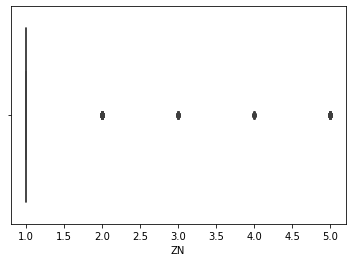

In [212]:
sns.boxplot(df['ZN'])

In [213]:
#NOW OUR ZN is converted into categorical feature 

E:\Utkarsh\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


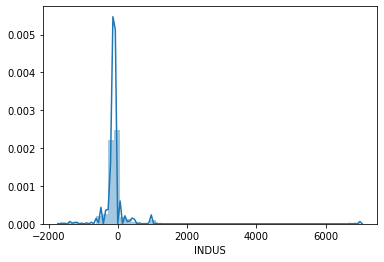

In [214]:
sns.distplot((1/np.log(df['INDUS'])*100))

In [215]:
df['INDUS']=df['INDUS'].apply(np.log)

In [216]:
df['INDUS']=df['INDUS'].apply(lambda x: x**-1)

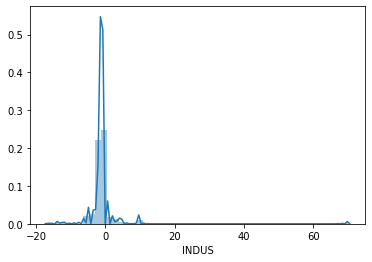

In [217]:
sns.distplot(df['INDUS'])

In [218]:
df['INDUS'].fillna(np.mean(df['INDUS']),inplace=True)

In [219]:
df['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

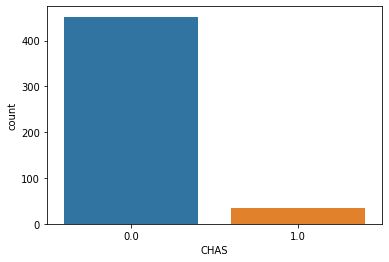

In [220]:
sns.countplot(df['CHAS'])

In [221]:
df['CHAS'].dropna(inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.3 KB


In [228]:
df['CRIM'].fillna(np.mean(df['CRIM']),inplace=True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.3 KB


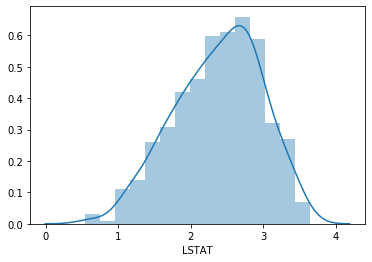

In [231]:
sns.distplot(np.log(df['LSTAT']))

In [232]:
df['LSTAT']=df['LSTAT'].apply(np.log)

In [234]:
df['LSTAT'].fillna(np.mean(df['LSTAT']),inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


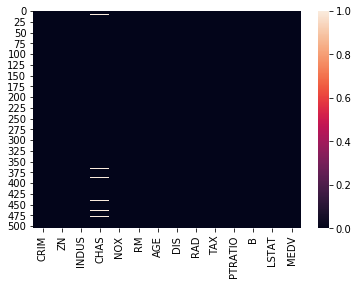

In [236]:
sns.heatmap(df.isnull())

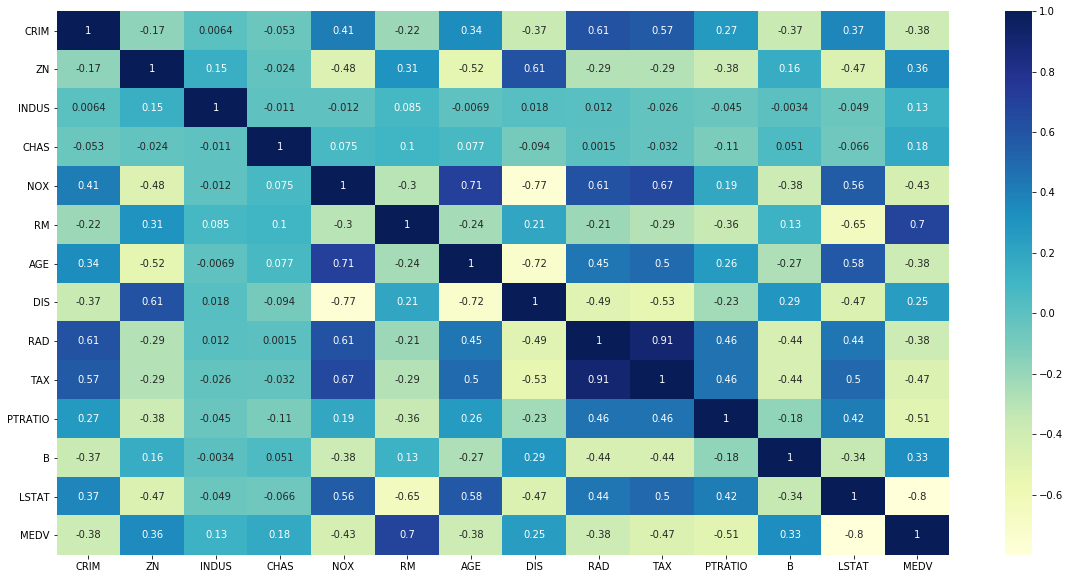

In [241]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [243]:
df['CHAS'].fillna(1,inplace=True)

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler=StandardScaler()

In [246]:
from sklearn.model_selection import train_test_split

In [334]:
y=df['MEDV']
X=df.drop(['MEDV'],axis=1)

In [351]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1,)

In [352]:
X_train=scaler.fit_transform(X_train)

In [353]:
X_test=scaler.transform(X_test)

In [354]:
from sklearn.ensemble import RandomForestRegressor

In [355]:
lr=RandomForestRegressor()

In [356]:
lr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [357]:
pred=lr.predict(X_test)

In [358]:
print(lr.score(X_test,y_test))

0.9010804879755335
